In [1]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (18,10)

# ITI Percentages Graph

In [4]:
#survey_df['Intertrial Interval (ITI) (time between trials)'].value_counts(dropna=False)

In [5]:
survey_df = pd.read_csv(r"C:\Users\yongc\Desktop\Copy of Literature Review (Responses) - Copy of Form Responses 1.csv", keep_default_na=False)

In [6]:
survey_df["Rats used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")
survey_df["Mice used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")

In [7]:
comma_df = survey_df['Intertrial Interval (ITI) (time between trials)'].str.contains(',')
#no_comma_df = survey_df['Intertrial Interval (ITI) (time between trials)'].str.contains(',')==False
rat_df = survey_df["Rats used"]
mice_df = survey_df["Mice used"]

In [8]:
#Finding number of mice trials
m_trials = 0
for i in range(len(mice_df)):
    if mice_df[i] =='1':
        m_trials = m_trials + 1
r_trials = 650-m_trials

In [9]:
#Finding percentage of trials that corresponded to each bin 
m_1 = 0
r_1 = 0
m_2 = 0  
r_2 = 0 
for i in range(len(comma_df)):
    if comma_df[i] == False and mice_df[i] == '1': #Mouse and no comma
        m_1 = m_1 +1
    elif comma_df[i] == False and mice_df[i] == '0': #Rat and no comma
        r_1 = r_1 +1
    elif comma_df[i] == True and mice_df[i] == '1': #Mouse comma
        m_2 = m_2 +1
    elif comma_df[i] == True and mice_df[i] == '0': #Rat comma
        r_2 = r_2 +1
        
#Getting percentage
mice_overall = []
mice_overall.append(m_1)
mice_overall.append(m_2)
mice_overall_P = [x / m_trials for x in mice_overall]

rats_overall = []
rats_overall.append(r_1)
rats_overall.append(r_2)
rats_overall_P = [x / r_trials for x in rats_overall]

Text(0, 0.5, 'Percentage')

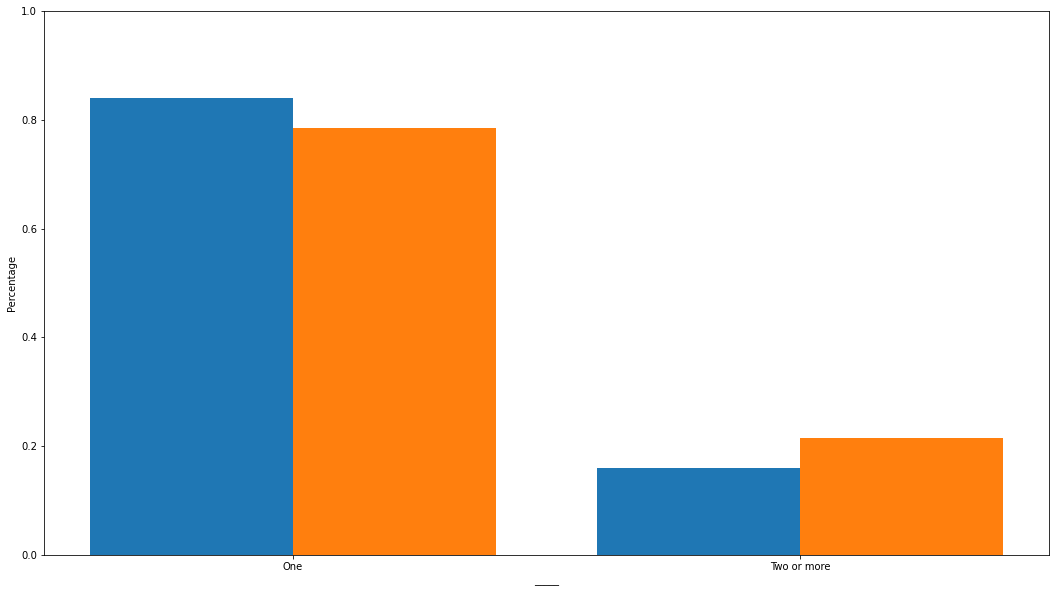

In [10]:
#Graphing percentages
x = ['One', 'Two or more']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, mice_overall_P, 0.4, label = 'mice')
plt.bar(x_axis + 0.2, rats_overall_P, 0.4, label = 'rats')
plt.xticks(x_axis, x)
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.xlabel("_____")
plt.ylabel('Percentage')


# Subject vs Social Agent Bar graph

Percent of papers the specify social agent vs subject

   Age

   Housing history

   Strain

   Social rank

   Sex

In [11]:
#survey_df.pivot(index = )

SyntaxError: invalid syntax (Temp/ipykernel_30728/1986663532.py, line 1)

In [ ]:
#Create two lists, one for subject one for social agent
#Within each column find number of nonspecifed and percentage them. Put them
# in correct list 
#Make bar graph 

In [12]:
subject_data = []
agent_data = []

In [13]:
#Subject Data
subject_age_P = sum(survey_df['Subject Age'].str.contains('does not specify')) / len(survey_df['Subject Age'])
subject_data.append(subject_age_P)
subject_housing_P = sum(survey_df['Subject Housing'].str.contains('does not specify')) / len(survey_df['Subject Housing'])
subject_data.append(subject_housing_P)
subject_housing_P = sum(survey_df['Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black'].str.contains('does not specify')) / len(survey_df['Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black'])
subject_data.append(subject_housing_P)
subject_SR_P = sum(survey_df['Subject Social Rank'].str.contains('Does not specify')) / len(survey_df['Subject Social Rank'])
subject_data.append(subject_SR_P)
subject_sex_P = sum(survey_df['Subject Sex'].str.contains('Does not specifiy')) / len(survey_df['Subject Sex'])
subject_data.append(subject_sex_P)

In [14]:
#Social Agent Data
agent_age_P = sum(survey_df['Social Agent Age (check all that apply)'].str.contains('does not specify')) / len(survey_df['Social Agent Age (check all that apply)'])
agent_data.append(agent_age_P)
agent_housing_P = sum(survey_df['Social Agent Housing'].str.contains('does not specify')) / len(survey_df['Social Agent Housing'])
agent_data.append(agent_housing_P)
agent_housing_P = sum(survey_df['Social Agent Strain '].str.contains('pec' or 'n/a')) / len(survey_df['Social Agent Strain '])
agent_data.append(agent_housing_P)
agent_SR_P = sum(survey_df['Social Agent Rank'].str.contains('Does not specify')) / len(survey_df['Social Agent Rank'])
agent_data.append(agent_SR_P)
agent_sex_P = sum(survey_df['Social Agent Sex'].str.contains('Does not specifiy')) / len(survey_df['Social Agent Sex'])
agent_data.append(agent_sex_P)

Text(0.5, 1.0, 'Title')

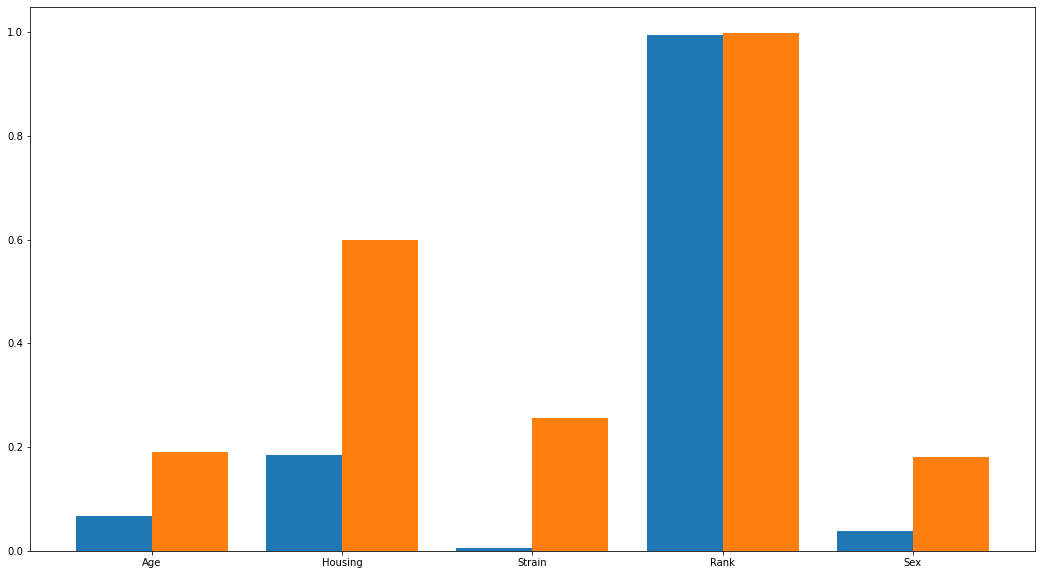

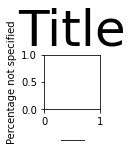

In [24]:
x = ['Age', 'Housing','Strain','Rank','Sex']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, subject_data, 0.4, label = 'Subject')
plt.bar(x_axis + 0.2, agent_data, 0.4, label = 'Social Agents')

plt.xticks(x_axis, x)
plt.yticks(np.arange(0, 1.2, step=0.2))

fig = plt.figure()
fig.set_size_inches(1, 1)

#Visuals
plt.xlabel("_____")
plt.ylabel('Percentage not specified')
plt.title("Title", fontsize = 50)
#plt.figure(figsize=(3, 1))